In [4]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv("waze_dataset.csv")

In [6]:
df.head

<bound method NDFrame.head of           ID     label  sessions  drives  total_sessions  \
0          0  retained       283     226      296.748273   
1          1  retained       133     107      326.896596   
2          2  retained       114      95      135.522926   
3          3  retained        49      40       67.589221   
4          4  retained        84      68      168.247020   
...      ...       ...       ...     ...             ...   
14994  14994  retained        60      55      207.875622   
14995  14995  retained        42      35      187.670313   
14996  14996  retained       273     219      422.017241   
14997  14997   churned       149     120      180.524184   
14998  14998  retained        73      58      353.419797   

       n_days_after_onboarding  total_navigations_fav1  \
0                         2276                     208   
1                         1225                      19   
2                         2651                       0   
3                

# **Data Cleaning**

**1. Removing null values from the dataset**

In [7]:
#Checking if dataset has null values
df.isnull().sum()

ID                           0
label                      700
sessions                     0
drives                       0
total_sessions               0
n_days_after_onboarding      0
total_navigations_fav1       0
total_navigations_fav2       0
driven_km_drives             0
duration_minutes_drives      0
activity_days                0
driving_days                 0
device                       0
dtype: int64

In [8]:
df.dropna(subset=['label'], inplace=True)

In [9]:
df.isnull().sum()

ID                         0
label                      0
sessions                   0
drives                     0
total_sessions             0
n_days_after_onboarding    0
total_navigations_fav1     0
total_navigations_fav2     0
driven_km_drives           0
duration_minutes_drives    0
activity_days              0
driving_days               0
device                     0
dtype: int64

**2. Zero Value Handling: Mean Imputation**

In [10]:
columns_with_zeros = (df == 0).any()

In [11]:
num_columns_with_zeros = columns_with_zeros.sum()
print(num_columns_with_zeros)

7


In [12]:
columns_with_zeros_names = columns_with_zeros[columns_with_zeros].index.tolist()
print(f"Columns with zero values: {columns_with_zeros_names}")

Columns with zero values: ['ID', 'sessions', 'drives', 'total_navigations_fav1', 'total_navigations_fav2', 'activity_days', 'driving_days']


In [13]:
column_mean1 = df['sessions'].mean()
column_mean2 = df['drives'].mean()
column_mean3 = df['total_navigations_fav1'].mean()
column_mean4 = df['total_navigations_fav2'].mean()
column_mean5 = df['activity_days'].mean()
column_mean6 = df['driving_days'].mean()
df["sessions"] = df["sessions"].replace(0, column_mean1)
df["drives"] = df["drives"].replace(0, column_mean2)
df["total_navigations_fav1"] = df["total_navigations_fav1"].replace(0, column_mean3)
df["total_navigations_fav2"] = df["total_navigations_fav2"].replace(0, column_mean4)
df["activity_days"] = df["activity_days"].replace(0, column_mean5)
df["driving_days"] = df["driving_days"].replace(0, column_mean6)

In [14]:
columns_with_zeros = (df == 0).any()
num_columns_with_zeros = columns_with_zeros.sum()
print(num_columns_with_zeros)

1


**3. Class Imbalance Handling**

In [15]:
class_counts = df['label'].value_counts()
print(class_counts)


retained    11763
churned      2536
Name: label, dtype: int64


In [16]:
imbalance_ratio = class_counts['retained'] / class_counts['churned']
print(f'Class Imbalance Ratio: {imbalance_ratio:.2f}')


Class Imbalance Ratio: 4.64


In [17]:
# Separate the majority and minority classes
majority_class = df[df['label'] == 'retained']
minority_class = df[df['label'] == 'churned']

# Determine the number of additional samples needed to balance the classes
num_samples_needed = len(majority_class) - len(minority_class)

# Randomly sample from the minority class to create synthetic data
oversampled_minority = minority_class.sample(n=num_samples_needed, replace=True, random_state=42)

# Combine the majority class with the oversampled minority class
balanced_df = pd.concat([majority_class, oversampled_minority], axis=0)

# Shuffle the balanced dataset
balanced_df = balanced_df.sample(frac=1, random_state=42)



In [18]:
class_counts = balanced_df['label'].value_counts()
print(class_counts)


retained    11763
churned      9227
Name: label, dtype: int64


**4. Label Encoding**

In [19]:
balanced_df.dtypes

ID                           int64
label                       object
sessions                   float64
drives                     float64
total_sessions             float64
n_days_after_onboarding      int64
total_navigations_fav1     float64
total_navigations_fav2     float64
driven_km_drives           float64
duration_minutes_drives    float64
activity_days              float64
driving_days               float64
device                      object
dtype: object

In [20]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder
label_encoder = LabelEncoder()

# Encode the 'label' and 'device' columns in place
balanced_df['label'] = label_encoder.fit_transform(balanced_df['label'])
balanced_df['device'] = label_encoder.fit_transform(balanced_df['device'])


In [21]:
balanced_df.dtypes

ID                           int64
label                        int32
sessions                   float64
drives                     float64
total_sessions             float64
n_days_after_onboarding      int64
total_navigations_fav1     float64
total_navigations_fav2     float64
driven_km_drives           float64
duration_minutes_drives    float64
activity_days              float64
driving_days               float64
device                       int32
dtype: object

**5. Dropping Unwanted Columns**

In [22]:
balanced_df = balanced_df.drop('ID', axis=1)

In [23]:
balanced_df

,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
2022,0,132.0,132.0,177.582171,2572,48.000000,81.000000,1593.572626,1278.959255,6.0,3.00000,1
14086,0,317.0,261.0,475.191762,2030,47.000000,29.638296,1129.984346,671.395760,8.0,7.00000,1
7784,1,139.0,113.0,164.421337,3084,121.747395,29.638296,2274.039796,705.349482,24.0,15.00000,1
9949,1,211.0,169.0,324.970847,2976,7.000000,36.000000,3682.003054,2780.601499,9.0,3.00000,1
7656,1,79.0,66.0,176.127243,2761,71.000000,73.000000,3391.274054,1395.887358,23.0,20.00000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
14365,1,16.0,14.0,148.078370,2379,13.000000,36.000000,4790.796380,2773.211378,3.0,12.18253,1
11694,0,46.0,39.0,225.544576,1369,121.747395,15.000000,3009.979688,2385.138791,7.0,2.00000,1
6873,1,43.0,43.0,446.706825,504,277.000000,73.000000,1679.986535,960.359646,20.0,13.00000,1
1113,1,328.0,263.0,456.812844,2337,34.000000,29.638296,1753.899790,1426.747420,3.0,3.00000,1


**6. Selecting Features and Targets**

In [24]:
X = balanced_df.drop(columns=['label'])
y = balanced_df['label']

In [25]:
X

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
2022,132.0,132.0,177.582171,2572,48.000000,81.000000,1593.572626,1278.959255,6.0,3.00000,1
14086,317.0,261.0,475.191762,2030,47.000000,29.638296,1129.984346,671.395760,8.0,7.00000,1
7784,139.0,113.0,164.421337,3084,121.747395,29.638296,2274.039796,705.349482,24.0,15.00000,1
9949,211.0,169.0,324.970847,2976,7.000000,36.000000,3682.003054,2780.601499,9.0,3.00000,1
7656,79.0,66.0,176.127243,2761,71.000000,73.000000,3391.274054,1395.887358,23.0,20.00000,0
...,...,...,...,...,...,...,...,...,...,...,...
14365,16.0,14.0,148.078370,2379,13.000000,36.000000,4790.796380,2773.211378,3.0,12.18253,1
11694,46.0,39.0,225.544576,1369,121.747395,15.000000,3009.979688,2385.138791,7.0,2.00000,1
6873,43.0,43.0,446.706825,504,277.000000,73.000000,1679.986535,960.359646,20.0,13.00000,1
1113,328.0,263.0,456.812844,2337,34.000000,29.638296,1753.899790,1426.747420,3.0,3.00000,1


**7. Scaling**

In [26]:
column_names = X.columns.tolist()
print(column_names)

['sessions', 'drives', 'total_sessions', 'n_days_after_onboarding', 'total_navigations_fav1', 'total_navigations_fav2', 'driven_km_drives', 'duration_minutes_drives', 'activity_days', 'driving_days', 'device']


In [27]:
from sklearn.preprocessing import MinMaxScaler


# Extracting the device column
device_column = X['device']

# Drop the device column from features
new_X = X.drop(columns=['device'])

# Create a MinMaxScaler instance
scaler = MinMaxScaler()

# Fit and transform the numerical features using Min-Max scaling
scaled_values = scaler.fit_transform(new_X)

# Create a new DataFrame with the scaled values and original column names
scaled_X = pd.DataFrame(scaled_values, columns=new_X.columns)

# Reset the index of 'device_column' before adding it back to 'scaled_X'
scaled_X['device'] = device_column.reset_index(drop=True)

scaled_X


,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0.176550,0.220168,0.145865,0.734554,0.038057,0.193237,0.072581,0.079621,0.166667,0.068966,1
1,0.425876,0.436975,0.390623,0.579519,0.037247,0.069175,0.050634,0.041249,0.233333,0.206897,1
2,0.185984,0.188235,0.135041,0.881007,0.097771,0.069175,0.104796,0.043393,0.766667,0.482759,1
3,0.283019,0.282353,0.267079,0.850114,0.004858,0.084541,0.171451,0.174461,0.266667,0.068966,1
4,0.105121,0.109244,0.144668,0.788616,0.056680,0.173913,0.157688,0.087006,0.733333,0.655172,0
...,...,...,...,...,...,...,...,...,...,...,...
20985,0.020216,0.021849,0.121600,0.679348,0.009717,0.084541,0.223944,0.173994,0.066667,0.385604,1
20986,0.060647,0.063866,0.185310,0.390446,0.097771,0.033816,0.139637,0.149485,0.200000,0.034483,1
20987,0.056604,0.070588,0.367196,0.143021,0.223482,0.173913,0.076672,0.059499,0.633333,0.413793,1
20988,0.440701,0.440336,0.375508,0.667334,0.026721,0.069175,0.080171,0.088955,0.066667,0.068966,1


**8. Setting Precision**

In [28]:
scaled_X_rounded = scaled_X.round(3)
scaled_X_rounded

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0.177,0.220,0.146,0.735,0.038,0.193,0.073,0.080,0.167,0.069,1
1,0.426,0.437,0.391,0.580,0.037,0.069,0.051,0.041,0.233,0.207,1
2,0.186,0.188,0.135,0.881,0.098,0.069,0.105,0.043,0.767,0.483,1
3,0.283,0.282,0.267,0.850,0.005,0.085,0.171,0.174,0.267,0.069,1
4,0.105,0.109,0.145,0.789,0.057,0.174,0.158,0.087,0.733,0.655,0
...,...,...,...,...,...,...,...,...,...,...,...
20985,0.020,0.022,0.122,0.679,0.010,0.085,0.224,0.174,0.067,0.386,1
20986,0.061,0.064,0.185,0.390,0.098,0.034,0.140,0.149,0.200,0.034,1
20987,0.057,0.071,0.367,0.143,0.223,0.174,0.077,0.059,0.633,0.414,1
20988,0.441,0.440,0.376,0.667,0.027,0.069,0.080,0.089,0.067,0.069,1


**9. Checking if there are outliers in dataframe**

In [29]:
from scipy import stats
# Calculate Z-scores for all columns
z_scores = np.abs(stats.zscore(scaled_X_rounded))

# Define a threshold for outlier detection
threshold = 5

# Creating a Boolean DataFrame where 'True' indicates outliers
outliers = (z_scores > threshold)

print(outliers)


       sessions  drives  total_sessions  n_days_after_onboarding  \
0         False   False           False                    False   
1         False   False           False                    False   
2         False   False           False                    False   
3         False   False           False                    False   
4         False   False           False                    False   
...         ...     ...             ...                      ...   
20985     False   False           False                    False   
20986     False   False           False                    False   
20987     False   False           False                    False   
20988     False   False           False                    False   
20989     False   False           False                    False   

       total_navigations_fav1  total_navigations_fav2  driven_km_drives  \
0                       False                   False             False   
1                       False    

**10. Addressing Data Skewness**

In [30]:
skewness = scaled_X_rounded.apply(lambda x: stats.skew(x))

# Display the skewness for each column
print(skewness)

sessions                   2.064348
drives                     2.018546
total_sessions             1.507558
n_days_after_onboarding    0.102277
total_navigations_fav1     2.192617
total_navigations_fav2     3.035428
driven_km_drives           1.286884
duration_minutes_drives    1.697362
activity_days              0.236415
driving_days               0.297586
device                    -0.609841
dtype: float64


In [31]:
right_skewed_columns = ['sessions', 'drives', 'total_sessions', 'total_navigations_fav1', 'total_navigations_fav2', 'driven_km_drives', 'duration_minutes_drives']
scaled_X_rounded[right_skewed_columns] = np.log1p(scaled_X_rounded[right_skewed_columns])


In [32]:
scaled_X_rounded

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0.162969,0.198851,0.136278,0.735,0.037296,0.176471,0.070458,0.076961,0.167,0.069,1
1,0.354873,0.362558,0.330023,0.580,0.036332,0.066724,0.049742,0.040182,0.233,0.207,1
2,0.170586,0.172271,0.126633,0.881,0.093490,0.066724,0.099845,0.042101,0.767,0.483,1
3,0.249201,0.248421,0.236652,0.850,0.004988,0.081580,0.157858,0.160417,0.267,0.069,1
4,0.099845,0.103459,0.135405,0.789,0.055435,0.160417,0.146694,0.083422,0.733,0.655,0
...,...,...,...,...,...,...,...,...,...,...,...
20985,0.019803,0.021761,0.115113,0.679,0.009950,0.081580,0.202124,0.160417,0.067,0.386,1
20986,0.059212,0.062035,0.169743,0.390,0.093490,0.033435,0.131028,0.138892,0.200,0.034,1
20987,0.055435,0.068593,0.312619,0.143,0.201307,0.160417,0.074179,0.057325,0.633,0.414,1
20988,0.365337,0.364643,0.319181,0.667,0.026642,0.066724,0.076961,0.085260,0.067,0.069,1


# **Exploratory Data Analysis (EDA)**

**1. Summary Statistics**

In [33]:
summary_stats = scaled_X_rounded.describe()
print(summary_stats)

           sessions        drives  total_sessions  n_days_after_onboarding  \
count  20990.000000  20990.000000    20990.000000             20990.000000   
mean       0.100388      0.104000        0.142098                 0.476174   
std        0.093129      0.094493        0.092553                 0.288375   
min        0.000000      0.000000        0.000000                 0.000000   
25%        0.030529      0.033435        0.072321                 0.227000   
50%        0.074179      0.077887        0.124869                 0.461000   
75%        0.141500      0.146694        0.191446                 0.722000   
max        0.693147      0.693147        0.693147                 1.000000   

       total_navigations_fav1  total_navigations_fav2  driven_km_drives  \
count            20990.000000            20990.000000      20990.000000   
mean                 0.111108                0.091742          0.169353   
std                  0.092997                0.080706          0.094450 

**2. Class Distribution**

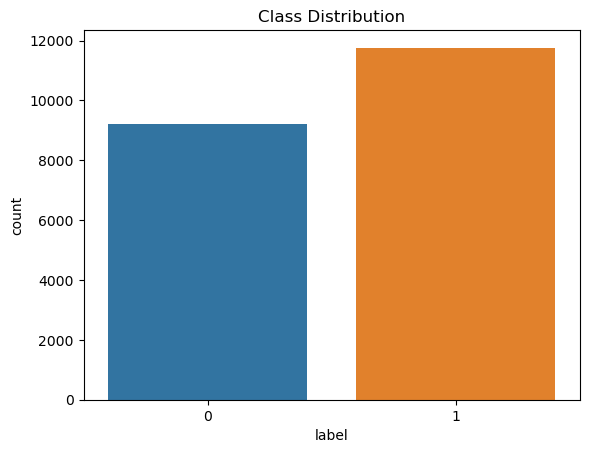

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='label', data=balanced_df)
plt.title('Class Distribution')
plt.show()


**3. Correlation Matrix**

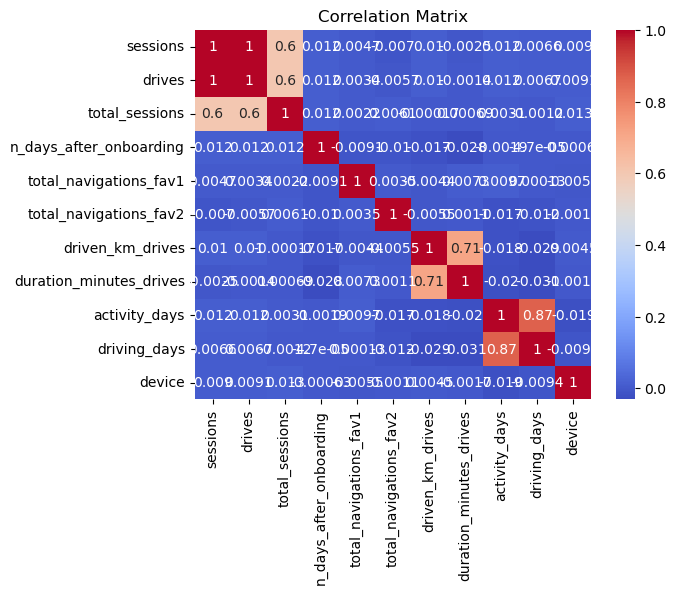

In [35]:
correlation_matrix = scaled_X_rounded.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


**4. Distribution Plots**

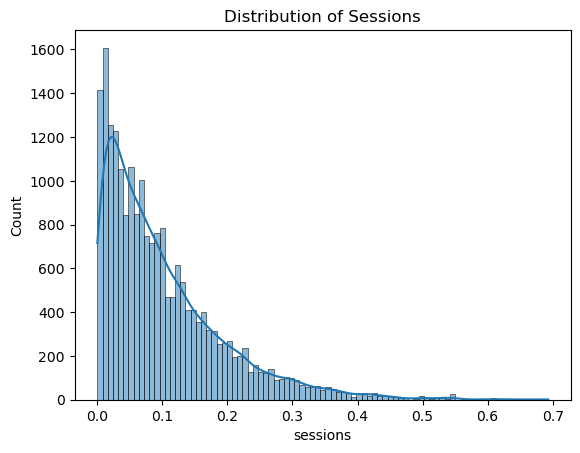

In [36]:
sns.histplot(scaled_X_rounded['sessions'], kde=True)
plt.title('Distribution of Sessions')
plt.show()


**5. Pairwise Scatter Plots**

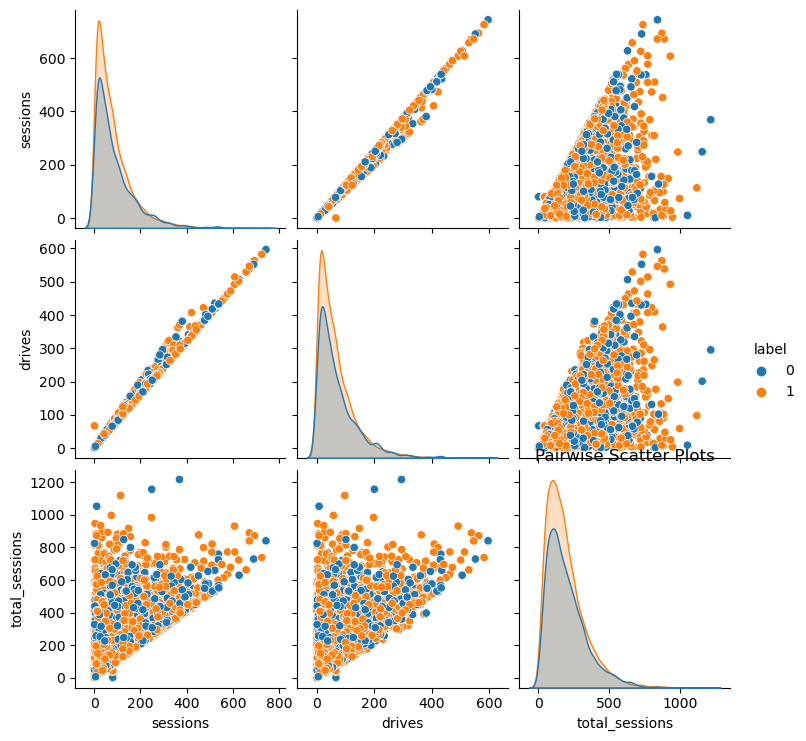

In [37]:
sns.pairplot(balanced_df[['sessions', 'drives', 'total_sessions', 'label']], hue='label')
plt.title('Pairwise Scatter Plots')
plt.show()

**6. Box Plots**

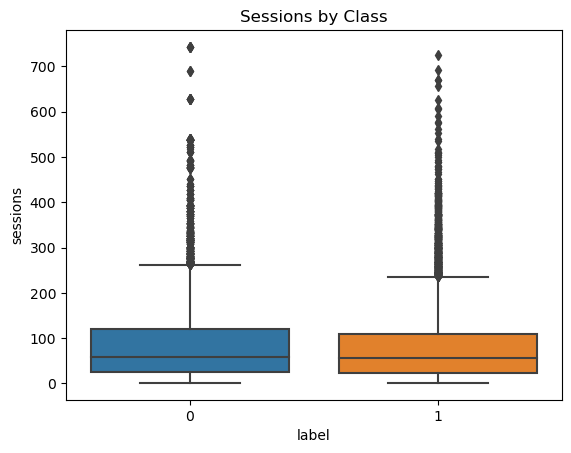

In [38]:
sns.boxplot(x='label', y='sessions', data=balanced_df)
plt.title('Sessions by Class')
plt.show()

**7. Count Plots**

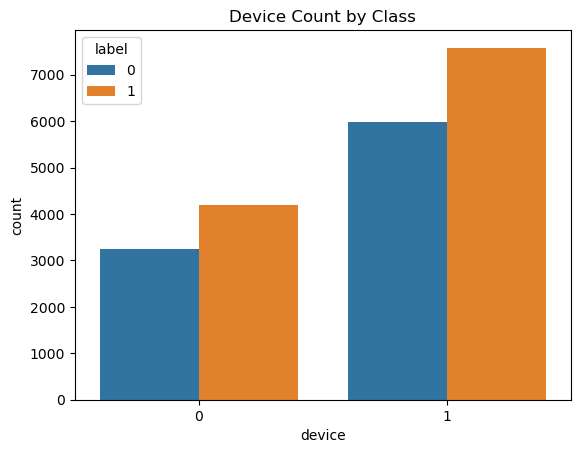

In [39]:
sns.countplot(x='device', hue='label', data=balanced_df)
plt.title('Device Count by Class')
plt.show()

**8. Outliers Detection**

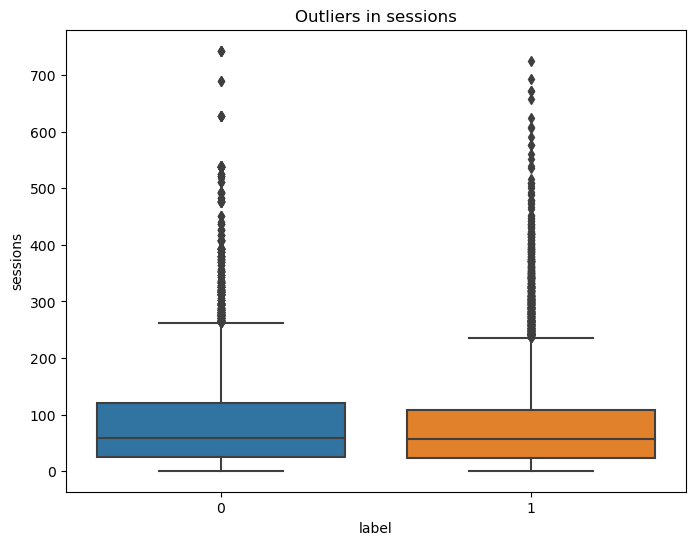

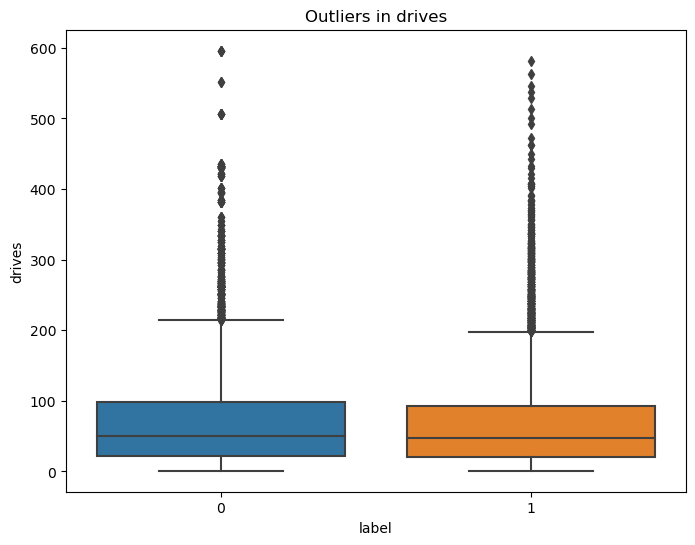

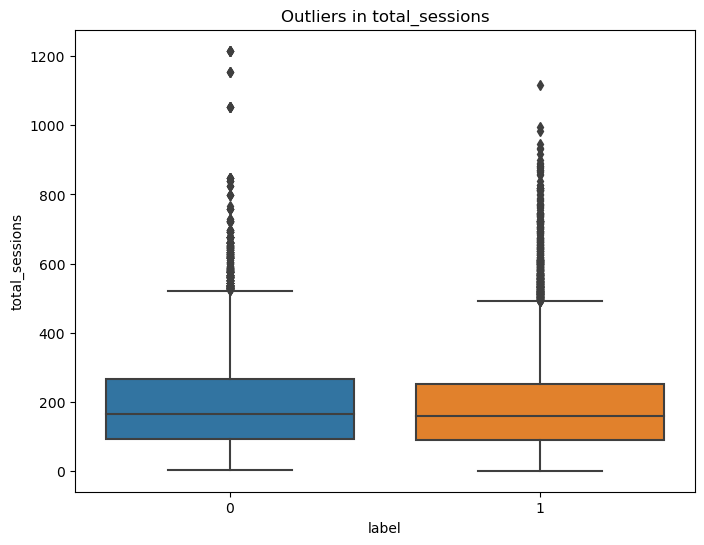

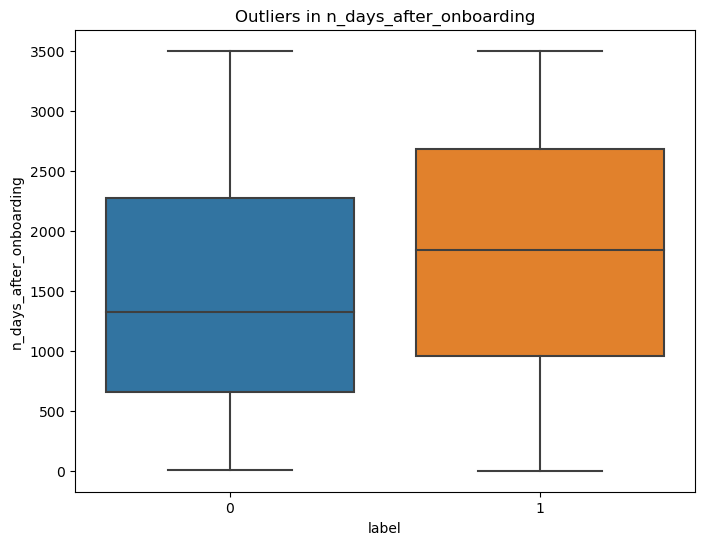

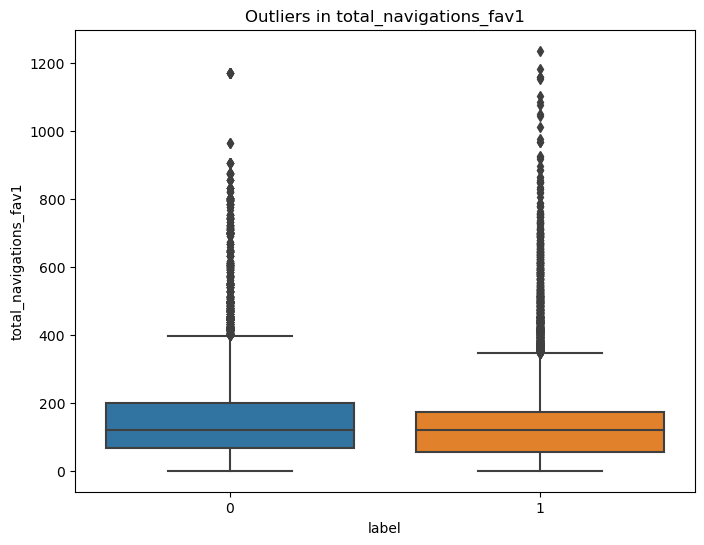

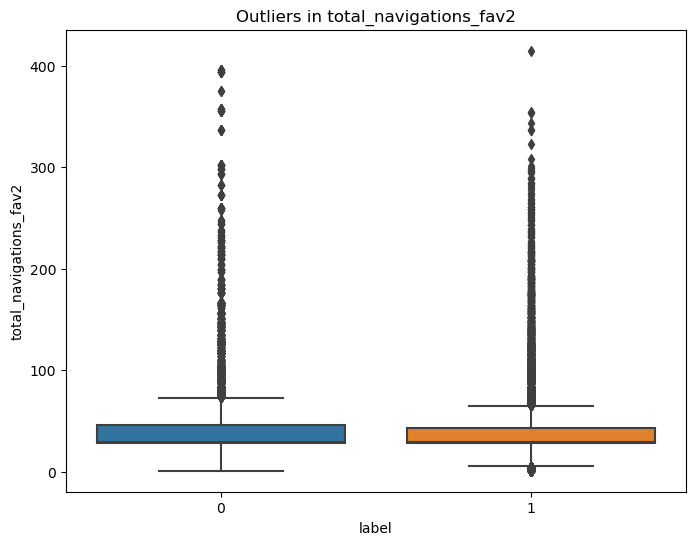

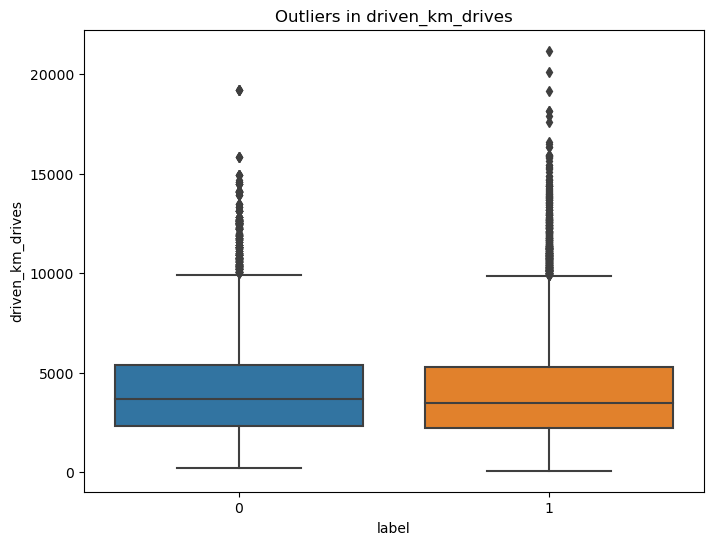

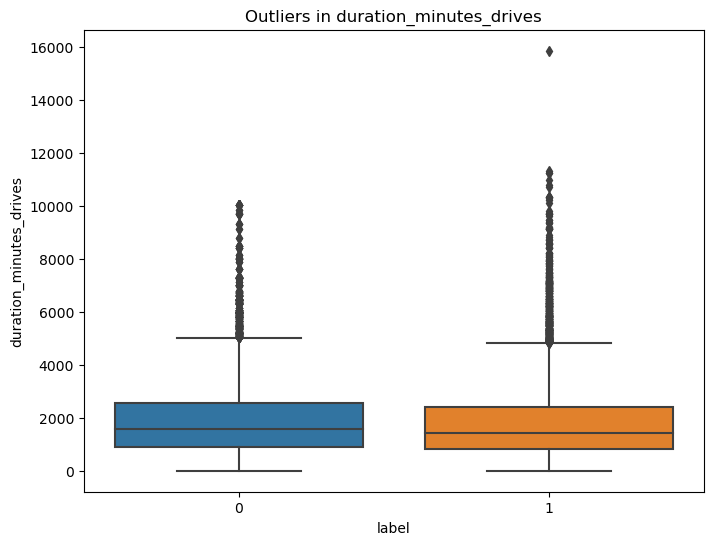

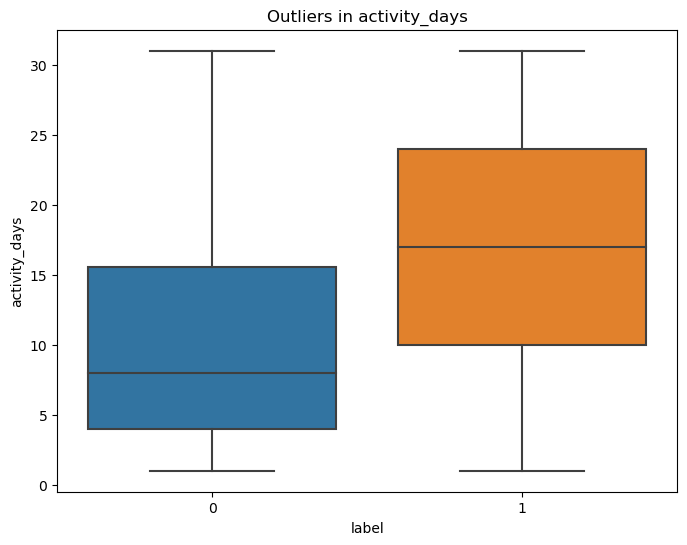

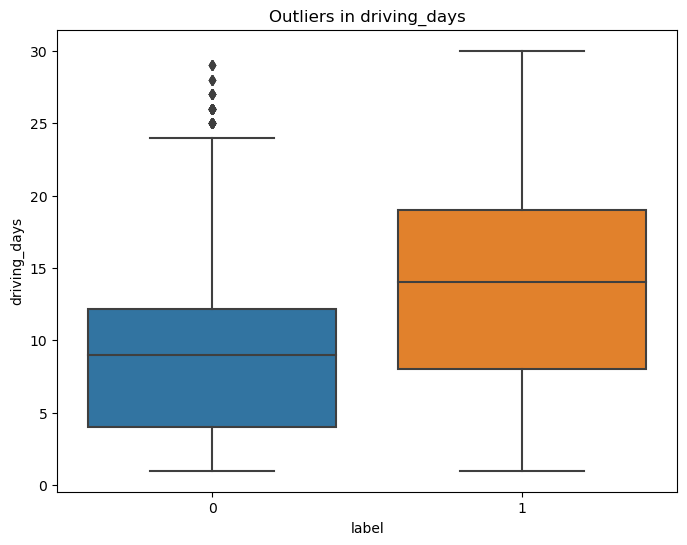

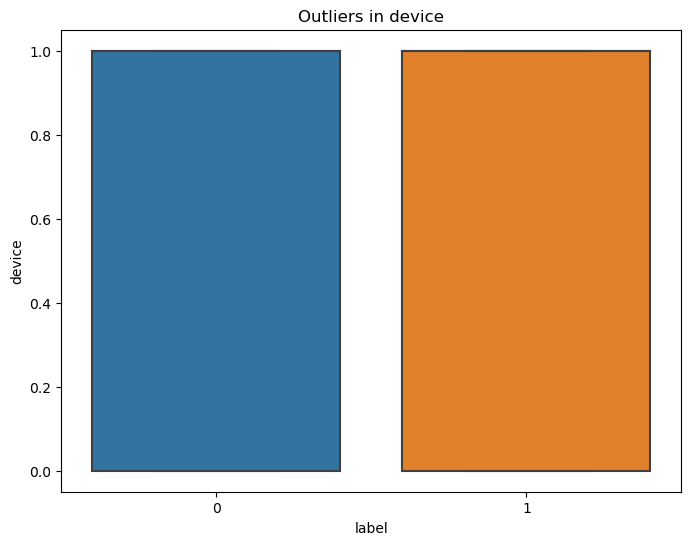

In [40]:
for feature in scaled_X_rounded.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='label', y=feature, data=balanced_df.reset_index())
    plt.title(f'Outliers in {feature}')
    plt.show()



**9. Stacked Bar Chart**

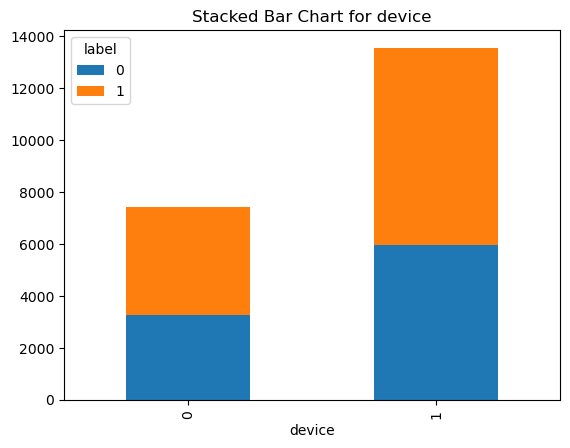

In [41]:
feature = 'device'
stacked_data = balanced_df.groupby([feature, 'label']).size().unstack().fillna(0)
stacked_data.plot(kind='bar', stacked=True)
plt.title(f'Stacked Bar Chart for {feature}')
plt.show()


**10. Grouped Histograms (Stacked)**

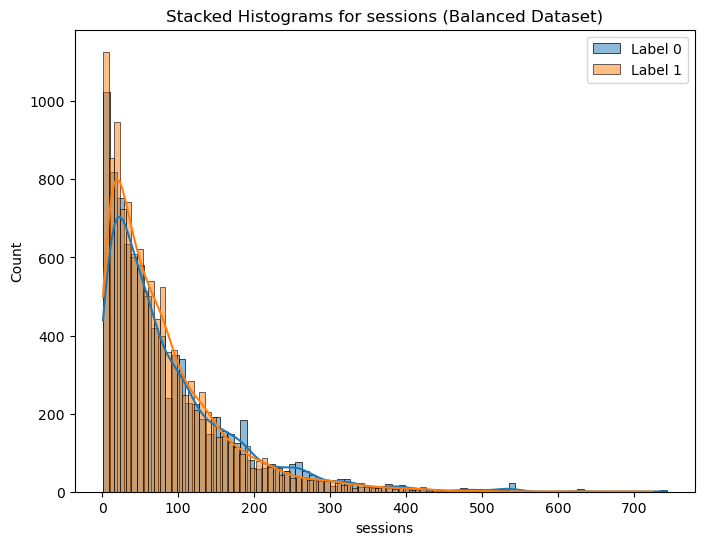

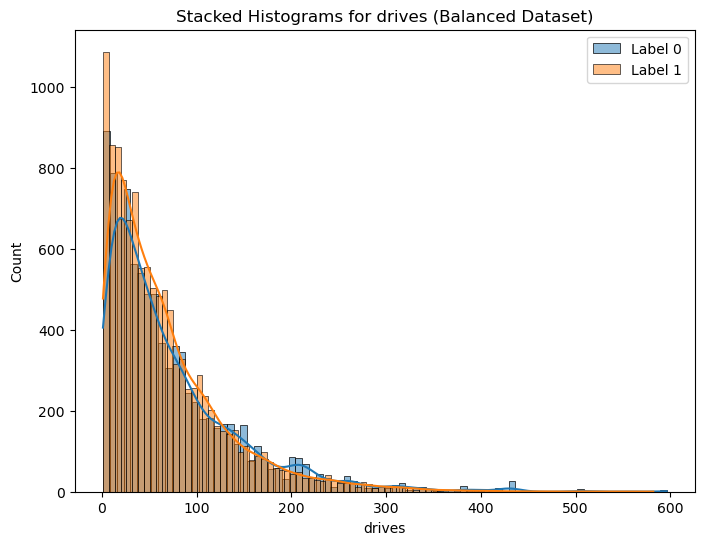

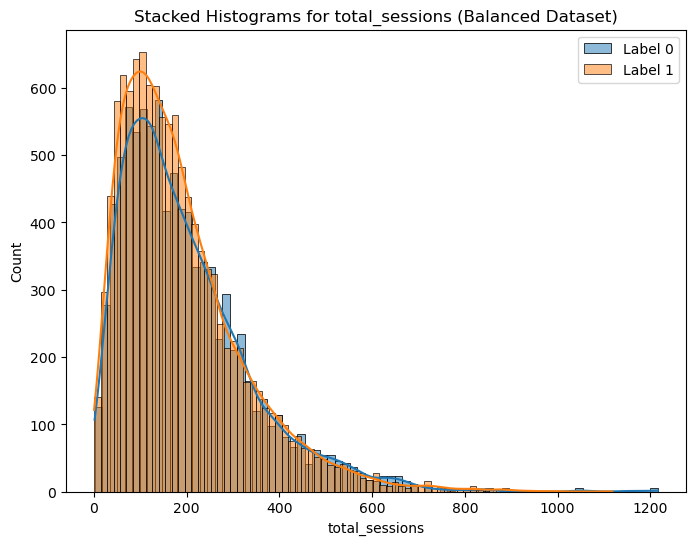

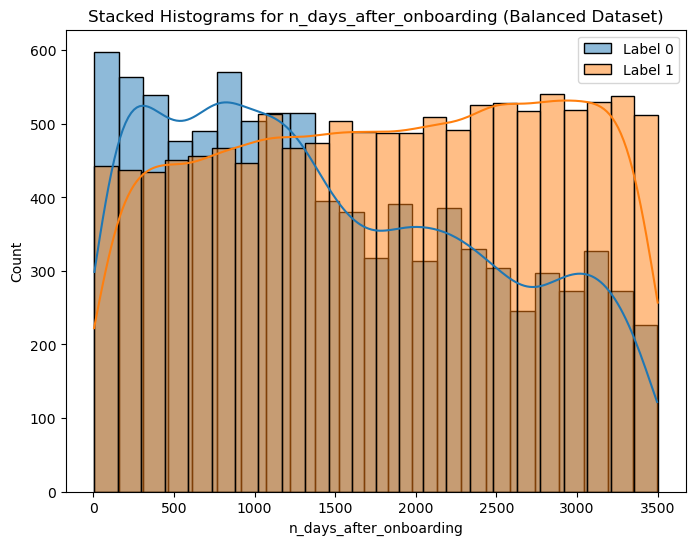

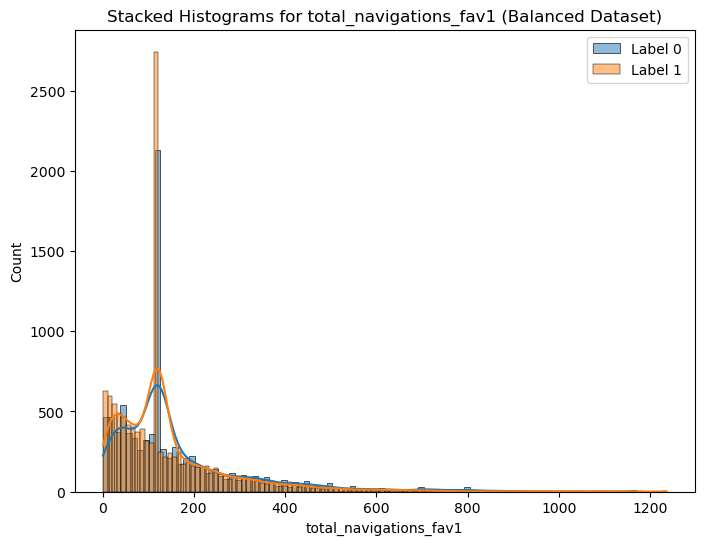

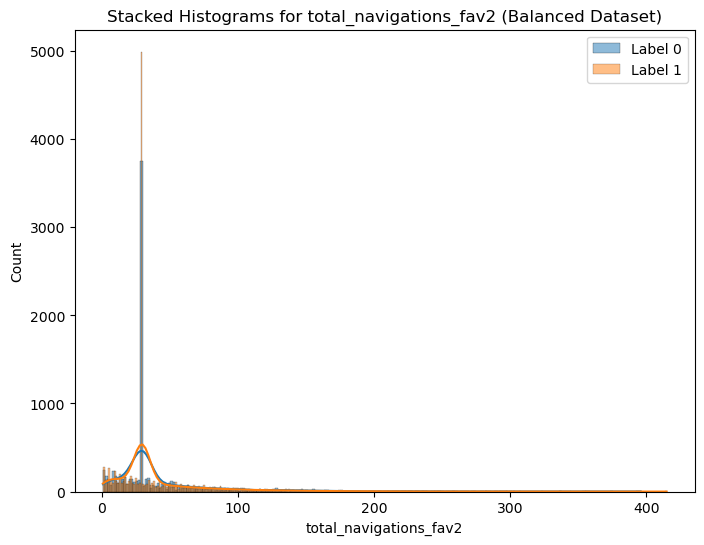

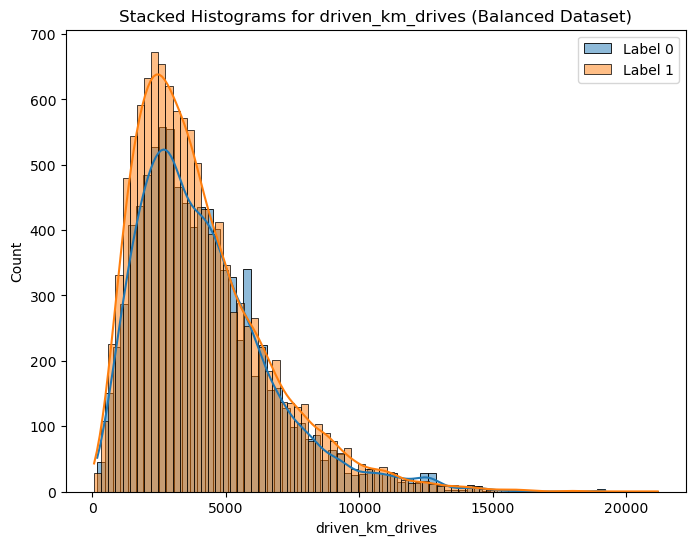

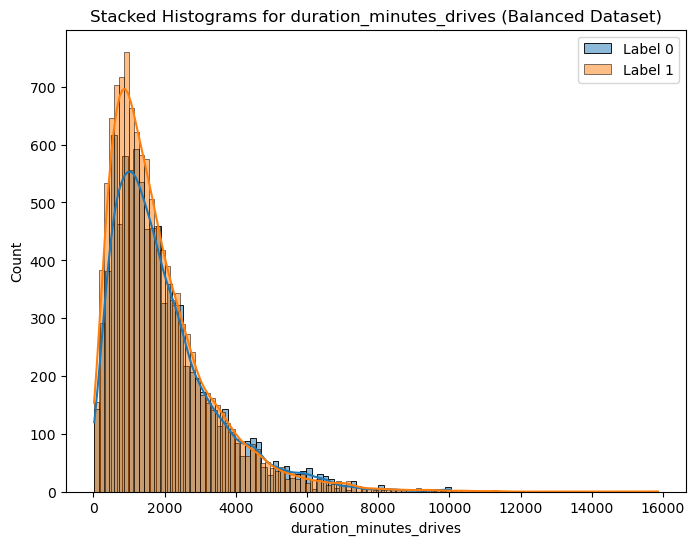

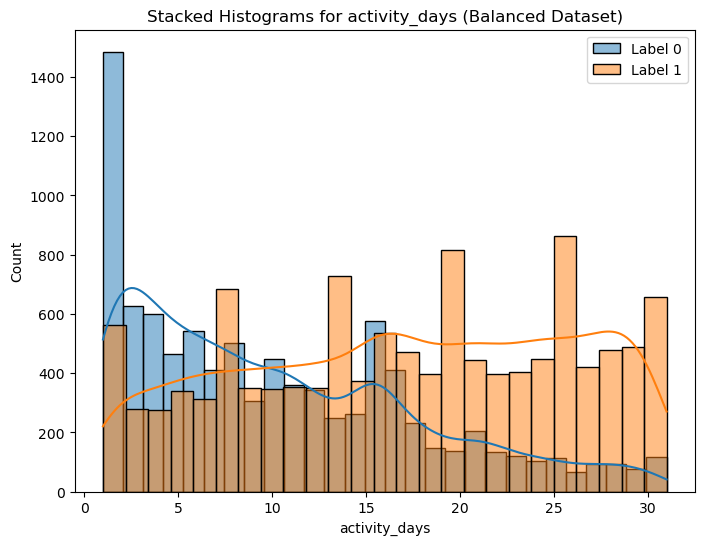

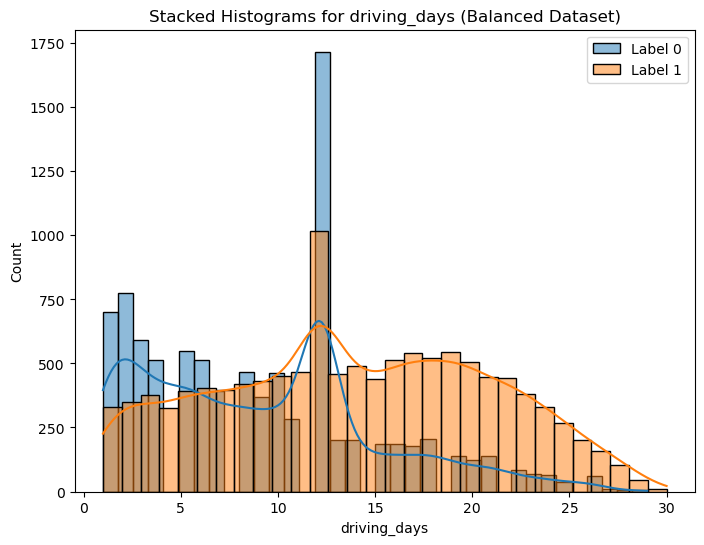

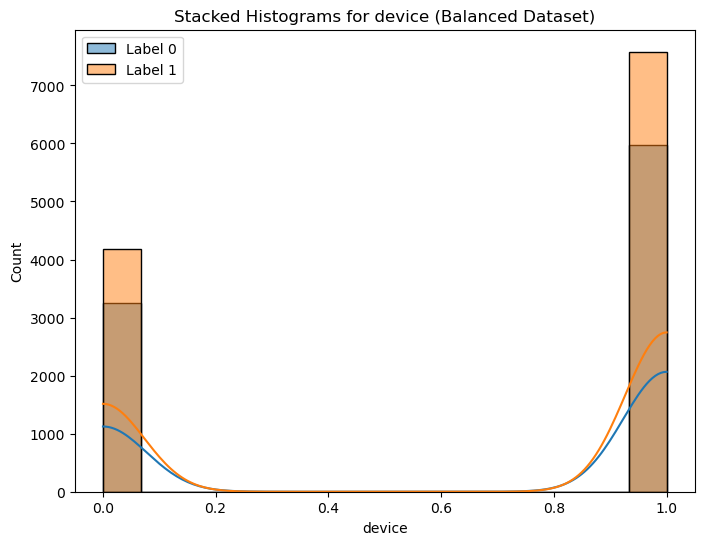

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_columns = scaled_X_rounded.columns

for feature in feature_columns:
    plt.figure(figsize=(8, 6))
    for label in balanced_df['label'].unique():
        sns.histplot(data=balanced_df[balanced_df['label'] == label], x=feature, kde=True, label=f'Label {label}')
    plt.title(f'Stacked Histograms for {feature} (Balanced Dataset)')
    plt.legend()
    plt.show()



In [43]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(scaled_X_rounded, y, test_size=0.2, random_state=42)


# **Phase 2-** **ML models**

# **1. Logistic Regression**

In [44]:
from sklearn.linear_model import LogisticRegression

# Create the Logistic Regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)


LogisticRegression()

In [45]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predicting on the test data
y_pred = model.predict(X_test)

# Calculating accuracy
accuracy_logistic = accuracy_score(y_test, y_pred)

# Displaying other metrics
print("Accuracy:", accuracy_logistic)
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.6931872320152453
              precision    recall  f1-score   support

           0       0.66      0.63      0.64      1848
           1       0.72      0.74      0.73      2350

    accuracy                           0.69      4198
   macro avg       0.69      0.69      0.69      4198
weighted avg       0.69      0.69      0.69      4198

Confusion Matrix:
 [[1169  679]
 [ 609 1741]]


In [46]:
# Creating a DataFrame for actual and predicted values
result_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Print the actual and predicted values
print(result_df)



       Actual  Predicted
5887        0          1
702         1          0
5282        0          0
12184       0          0
2946        1          1
...       ...        ...
14022       1          1
4635        1          1
10780       1          1
3524        1          0
602         0          1

[4198 rows x 2 columns]


# **2. Random Forest**

In [47]:
# Importing necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Initializing the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fitting the model to the training data
rf_classifier.fit(X_train, y_train)

# Making predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluating the model and calculating metrics
accuracy_random = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Printing and visualizing the results
print(f"Accuracy: {accuracy_random}")
print("Confusion Matrix:")
print(confusion_mat)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.9321105288232492
Confusion Matrix:
[[1757   91]
 [ 194 2156]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.92      1848
           1       0.96      0.92      0.94      2350

    accuracy                           0.93      4198
   macro avg       0.93      0.93      0.93      4198
weighted avg       0.93      0.93      0.93      4198



In [48]:
# Create a DataFrame for actual and predicted values
rand_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Printing the actual and predicted values
print(rand_df)


       Actual  Predicted
5887        0          0
702         1          0
5282        0          0
12184       0          0
2946        1          1
...       ...        ...
14022       1          1
4635        1          1
10780       1          0
3524        1          1
602         0          0

[4198 rows x 2 columns]


# **3. Extreme Gradient Boosting (XGBoost)**

In [49]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [50]:
# Importing necessary libraries
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Initialize the XGBoost Classifier
xgb_classifier = xgb.XGBClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb_classifier.predict(X_test)

# Evaluate the model
accuracy_gradient = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print and visualize the results
print(f"Accuracy: {accuracy_gradient}")
print("Confusion Matrix:")
print(confusion_mat)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.851357789423535
Confusion Matrix:
[[1605  243]
 [ 381 1969]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.87      0.84      1848
           1       0.89      0.84      0.86      2350

    accuracy                           0.85      4198
   macro avg       0.85      0.85      0.85      4198
weighted avg       0.85      0.85      0.85      4198



In [51]:
# Create a DataFrame for actual and predicted values
grad_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Print the actual and predicted values
print(grad_df)

       Actual  Predicted
5887        0          1
702         1          0
5282        0          0
12184       0          0
2946        1          1
...       ...        ...
14022       1          1
4635        1          1
10780       1          0
3524        1          1
602         0          0

[4198 rows x 2 columns]


# **4. Support Vector Machine (SVM)**

In [52]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Initializing the Support Vector Machine (SVM) Classifier
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)

# Fitting the model to the training data
svm_classifier.fit(X_train, y_train)

# Making predictions on the test data
y_pred = svm_classifier.predict(X_test)

# Evaluating the model
accuracy_svm = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Printing and visualizing the results
print(f"Accuracy: {accuracy_svm}")
print("Confusion Matrix:")
print(confusion_mat)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.6881848499285373
Confusion Matrix:
[[1228  620]
 [ 689 1661]]
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.66      0.65      1848
           1       0.73      0.71      0.72      2350

    accuracy                           0.69      4198
   macro avg       0.68      0.69      0.68      4198
weighted avg       0.69      0.69      0.69      4198



In [53]:
# Creating a DataFrame for actual and predicted values
svm_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Printing the actual and predicted values
print(svm_df)

       Actual  Predicted
5887        0          1
702         1          0
5282        0          0
12184       0          0
2946        1          1
...       ...        ...
14022       1          1
4635        1          1
10780       1          1
3524        1          0
602         0          1

[4198 rows x 2 columns]


# **5. K-Nearest Neighbors (KNN)**

In [54]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Initializing the K-Nearest Neighbors (KNN) Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Fitting the model to the training data
knn_classifier.fit(X_train, y_train)

# Making predictions on the test data
y_pred = knn_classifier.predict(X_test)

# Evaluating the model
accuracy_knn = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Printing the results
print(f"Accuracy: {accuracy_knn}")
print("Confusion Matrix:")
print(confusion_mat)
print("Classification Report:")
print(classification_rep)


Accuracy: 0.7410671748451644
Confusion Matrix:
[[1520  328]
 [ 759 1591]]
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.82      0.74      1848
           1       0.83      0.68      0.75      2350

    accuracy                           0.74      4198
   macro avg       0.75      0.75      0.74      4198
weighted avg       0.76      0.74      0.74      4198



# **6. Naive Bayes**

In [55]:
# Importing necessary libraries
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Initializing the Naive Bayes Classifier
nb_classifier = GaussianNB()

# Fitting the model to the training data
nb_classifier.fit(X_train, y_train)

# Making predictions on the test data
y_pred = nb_classifier.predict(X_test)

# Evaluating the model
accuracy_nb = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Printing the results
print(f"Accuracy: {accuracy_nb}")
print("Confusion Matrix:")
print(confusion_mat)
print("Classification Report:")
print(classification_rep)


Accuracy: 0.6810385898046689
Confusion Matrix:
[[1317  531]
 [ 808 1542]]
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.71      0.66      1848
           1       0.74      0.66      0.70      2350

    accuracy                           0.68      4198
   macro avg       0.68      0.68      0.68      4198
weighted avg       0.69      0.68      0.68      4198



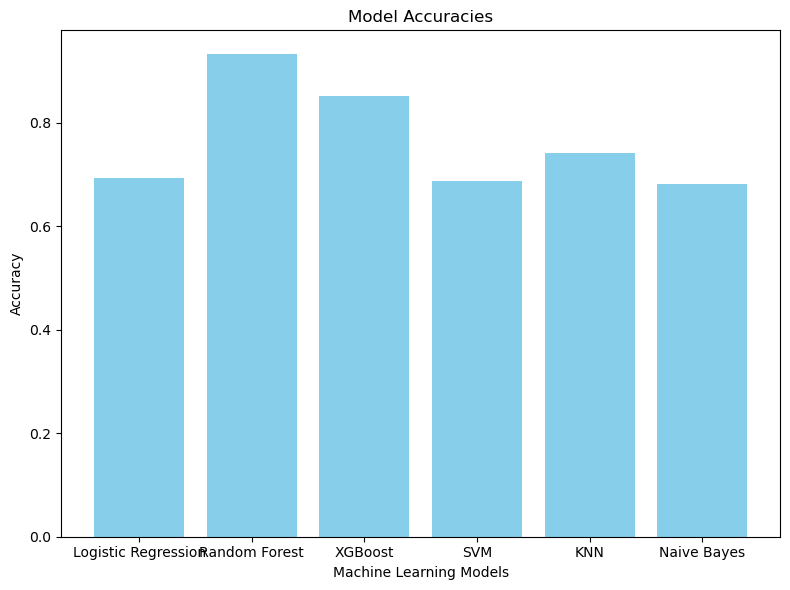

In [56]:
#Plotting all model accuracies
import matplotlib.pyplot as plt

# List of model names and their corresponding accuracies
model_names = ['Logistic Regression', 'Random Forest', 'XGBoost', 'SVM', 'KNN', 'Naive Bayes']
accuracies = [accuracy_logistic, accuracy_random, accuracy_gradient, accuracy_svm, accuracy_knn, accuracy_nb]

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(model_names, accuracies, color='skyblue')
plt.xlabel('Machine Learning Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracies')

# Automatically adjust the subplot layout to prevent overlapping
plt.tight_layout()

# Display the plot
plt.show()
